# Dignostic Analysis

This jupyter notebook includes analysis codes and vistualization for the Dianostic pages.

In [1]:
# Import needed libraries
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# make plots show inside the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
#Reading the selected dataset
df = pd.read_csv("processed_data.csv")
df.head()

,Unnamed: 0,Sex,Age,Hypertension,Heart Disease,Married,Work Type,Residence Type,Glucose,BMI,Smoking?,Stroke
0,0,Male,67.0,False,True,True,Private,Urban,228.69,36.6,formerly smoked,True
1,1,Female,61.0,False,False,True,Self-employed,Rural,202.21,0.0,never smoked,True
2,2,Male,80.0,False,True,True,Private,Rural,105.92,32.5,never smoked,True
3,3,Female,49.0,False,False,True,Private,Urban,171.23,34.4,smokes,True
4,4,Female,79.0,True,False,True,Self-employed,Rural,174.12,24.0,never smoked,True


In [4]:
#Checking data types
df.dtypes

Unnamed: 0          int64
Sex                object
Age               float64
Hypertension         bool
Heart Disease        bool
Married              bool
Work Type          object
Residence Type     object
Glucose           float64
BMI               float64
Smoking?           object
Stroke               bool
dtype: object

In [5]:
# Unique values for each feature (categorical inspection)
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].unique()[:7])  # show first 20 unique values


--- Unnamed: 0 ---
[0 1 2 3 4 5 6]

--- Sex ---
['Male' 'Female' 'Other']

--- Age ---
[67. 61. 80. 49. 79. 81. 74.]

--- Hypertension ---
[False  True]

--- Heart Disease ---
[ True False]

--- Married ---
[ True False]

--- Work Type ---
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

--- Residence Type ---
['Urban' 'Rural']

--- Glucose ---
[228.69 202.21 105.92 171.23 174.12 186.21  70.09]

--- BMI ---
[36.6  0.  32.5 34.4 24.  29.  27.4]

--- Smoking? ---
['formerly smoked' 'never smoked' 'smokes' 'Unknown']

--- Stroke ---
[ True False]


In [6]:
#Changed bool and categorical veriables into integers with data types changes and one-hot coding
df = df.copy()

# Convert booleans to int
for col in df.select_dtypes(include="bool").columns:
    df[col] = df[col].astype(int)

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include="object").columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df.head()

,Unnamed: 0,Age,Hypertension,Heart Disease,Married,Glucose,BMI,Stroke,Sex_Male,Sex_Other,Work Type_Never_worked,Work Type_Private,Work Type_Self-employed,Work Type_children,Residence Type_Urban,Smoking?_formerly smoked,Smoking?_never smoked,Smoking?_smokes
0,0,67.0,0,1,1,228.69,36.6,1,True,False,False,True,False,False,True,True,False,False
1,1,61.0,0,0,1,202.21,0.0,1,False,False,False,False,True,False,False,False,True,False
2,2,80.0,0,1,1,105.92,32.5,1,True,False,False,True,False,False,False,False,True,False
3,3,49.0,0,0,1,171.23,34.4,1,False,False,False,True,False,False,True,False,False,True
4,4,79.0,1,0,1,174.12,24.0,1,False,False,False,False,True,False,False,False,True,False


In [7]:
#Changing all features into Integers
df = df.astype(int)
df.dtypes.head(10)

#Rearranged features
df = df[
    [
        'Age',
        'Hypertension',
        'Heart Disease',
        #'Married',  # removed married column
        'Glucose',
        'BMI',
        'Sex_Male',
        'Sex_Other',
        'Work Type_Never_worked',
        'Work Type_Private',
        'Work Type_Self-employed',
        'Work Type_children',
        'Residence Type_Urban',
        'Smoking?_formerly smoked',
        'Smoking?_never smoked',
        'Smoking?_smokes',
        'Stroke'
    ]
]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       5110 non-null   int64
 1   Hypertension              5110 non-null   int64
 2   Heart Disease             5110 non-null   int64
 3   Glucose                   5110 non-null   int64
 4   BMI                       5110 non-null   int64
 5   Sex_Male                  5110 non-null   int64
 6   Sex_Other                 5110 non-null   int64
 7   Work Type_Never_worked    5110 non-null   int64
 8   Work Type_Private         5110 non-null   int64
 9   Work Type_Self-employed   5110 non-null   int64
 10  Work Type_children        5110 non-null   int64
 11  Residence Type_Urban      5110 non-null   int64
 12  Smoking?_formerly smoked  5110 non-null   int64
 13  Smoking?_never smoked     5110 non-null   int64
 14  Smoking?_smokes           5110 non-null 

In [8]:
#Saved the csv file for model training steps
#df.to_csv("processed_data_clean_all_integers.csv", index=False)

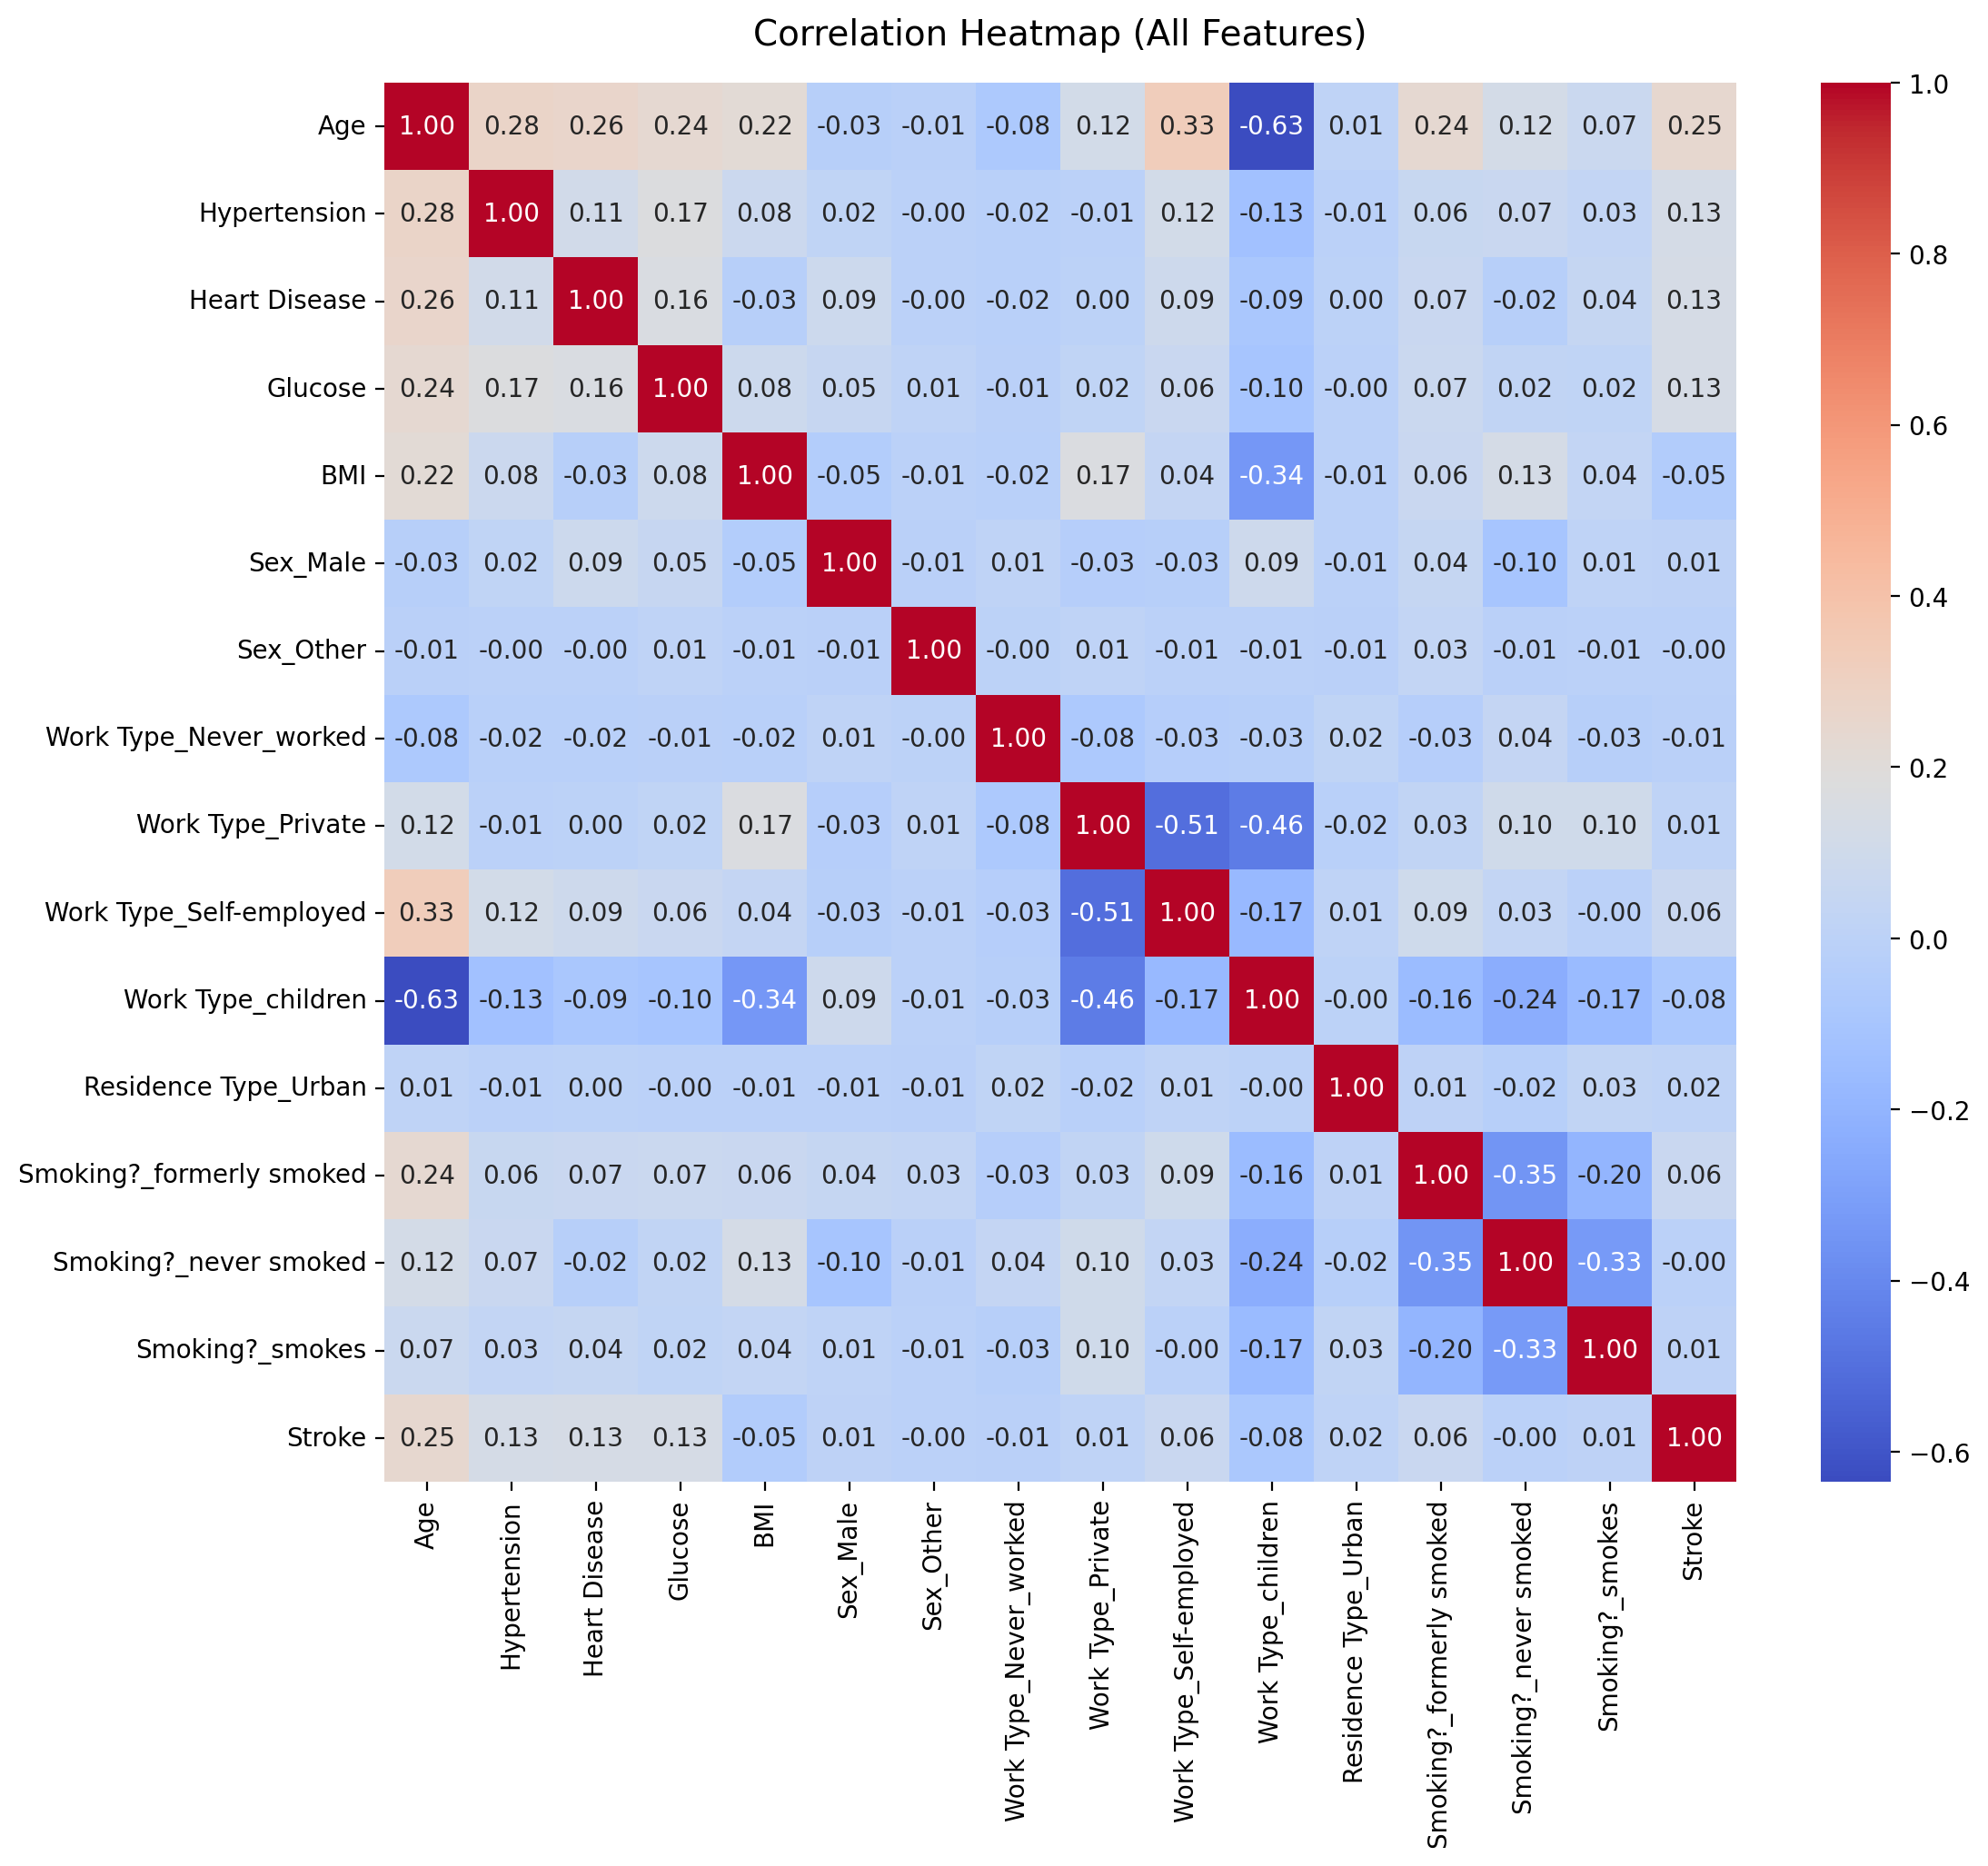

In [9]:
# === 1. Correlation matrix for all variables ===

correlations_data = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (All Features)", fontsize=14, pad=15)
plt.show()

In [10]:
# === 2. Scatter plots ===
import plotly.express as px

selected = ["Age","Glucose","BMI"]

fig = px.scatter_matrix(
    df[selected],
    dimensions=selected,
    title="Pair Plot for Age, Glucose, BMI",
    height=800, width=1100
)
# smaller markers for dense points
for d in fig.data:
    d.update(marker=dict(color="blue", size=3, opacity=0.7))

fig.show()

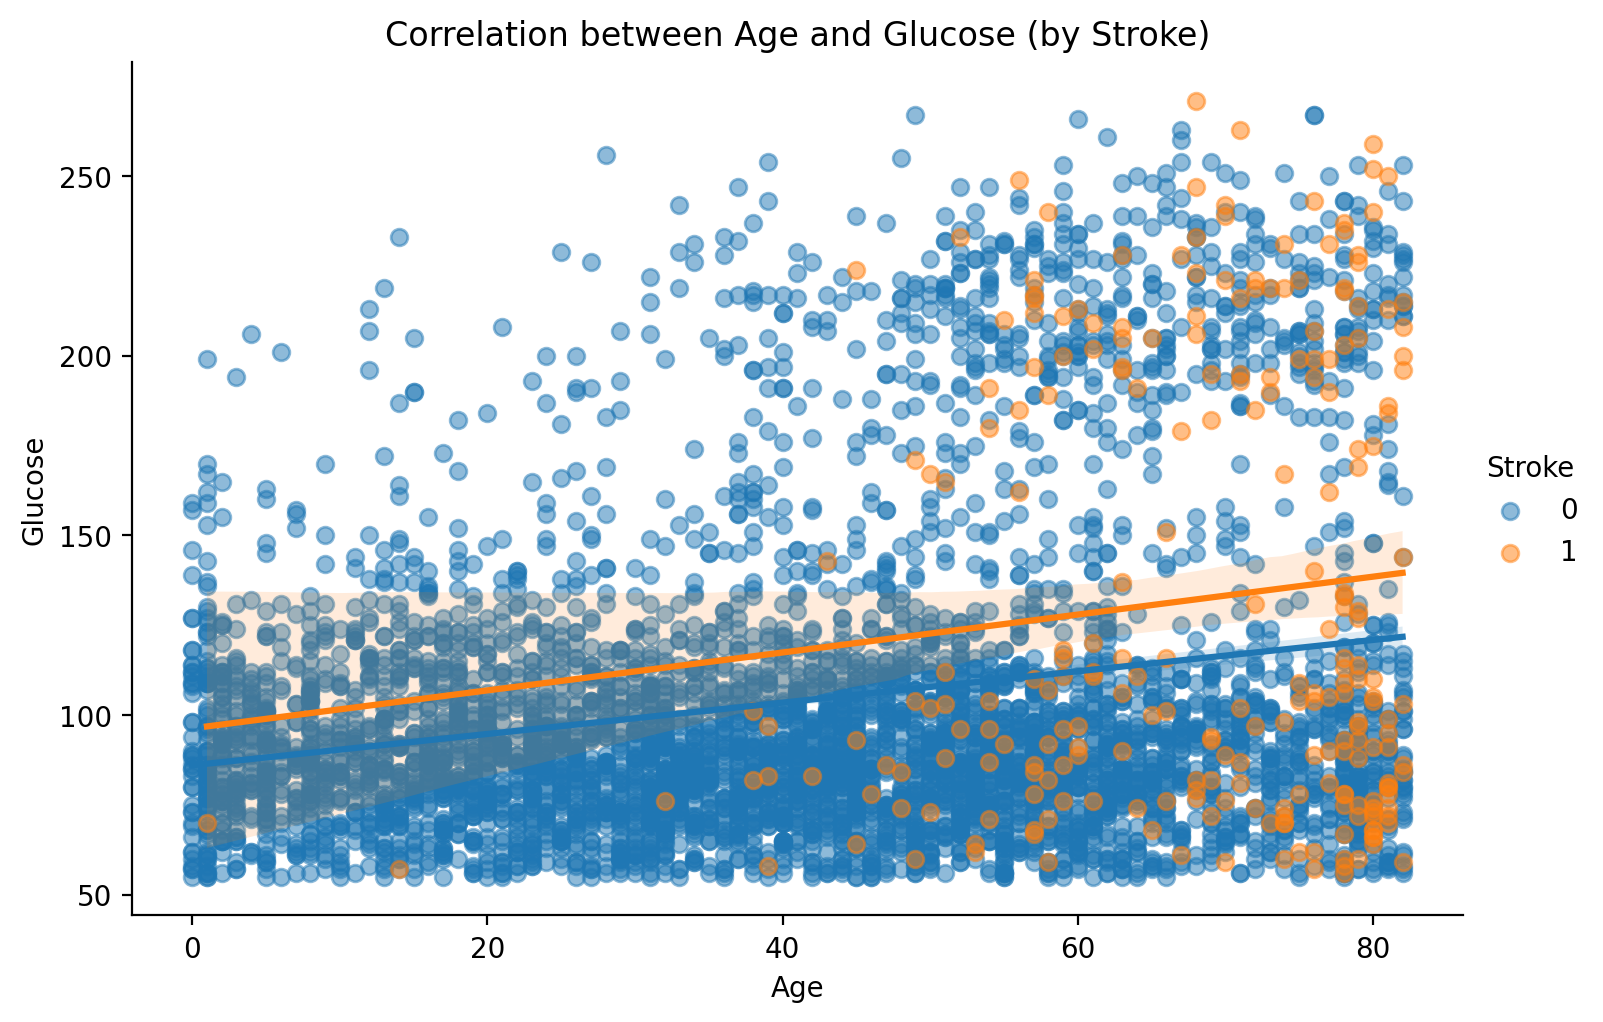

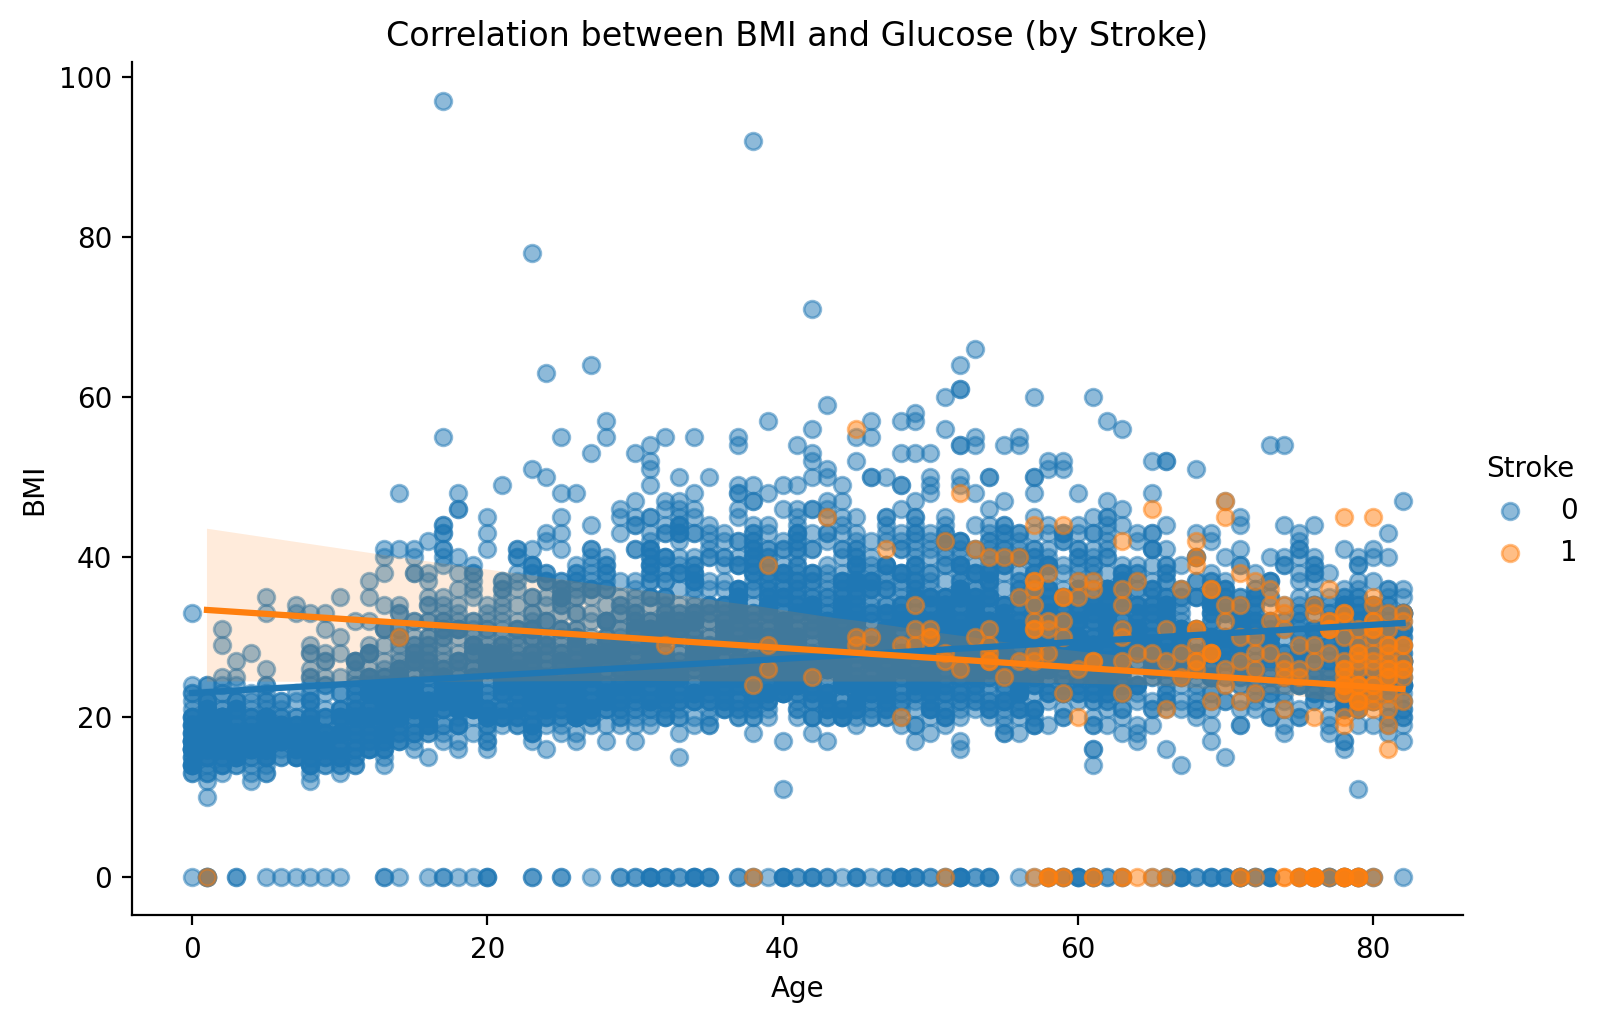

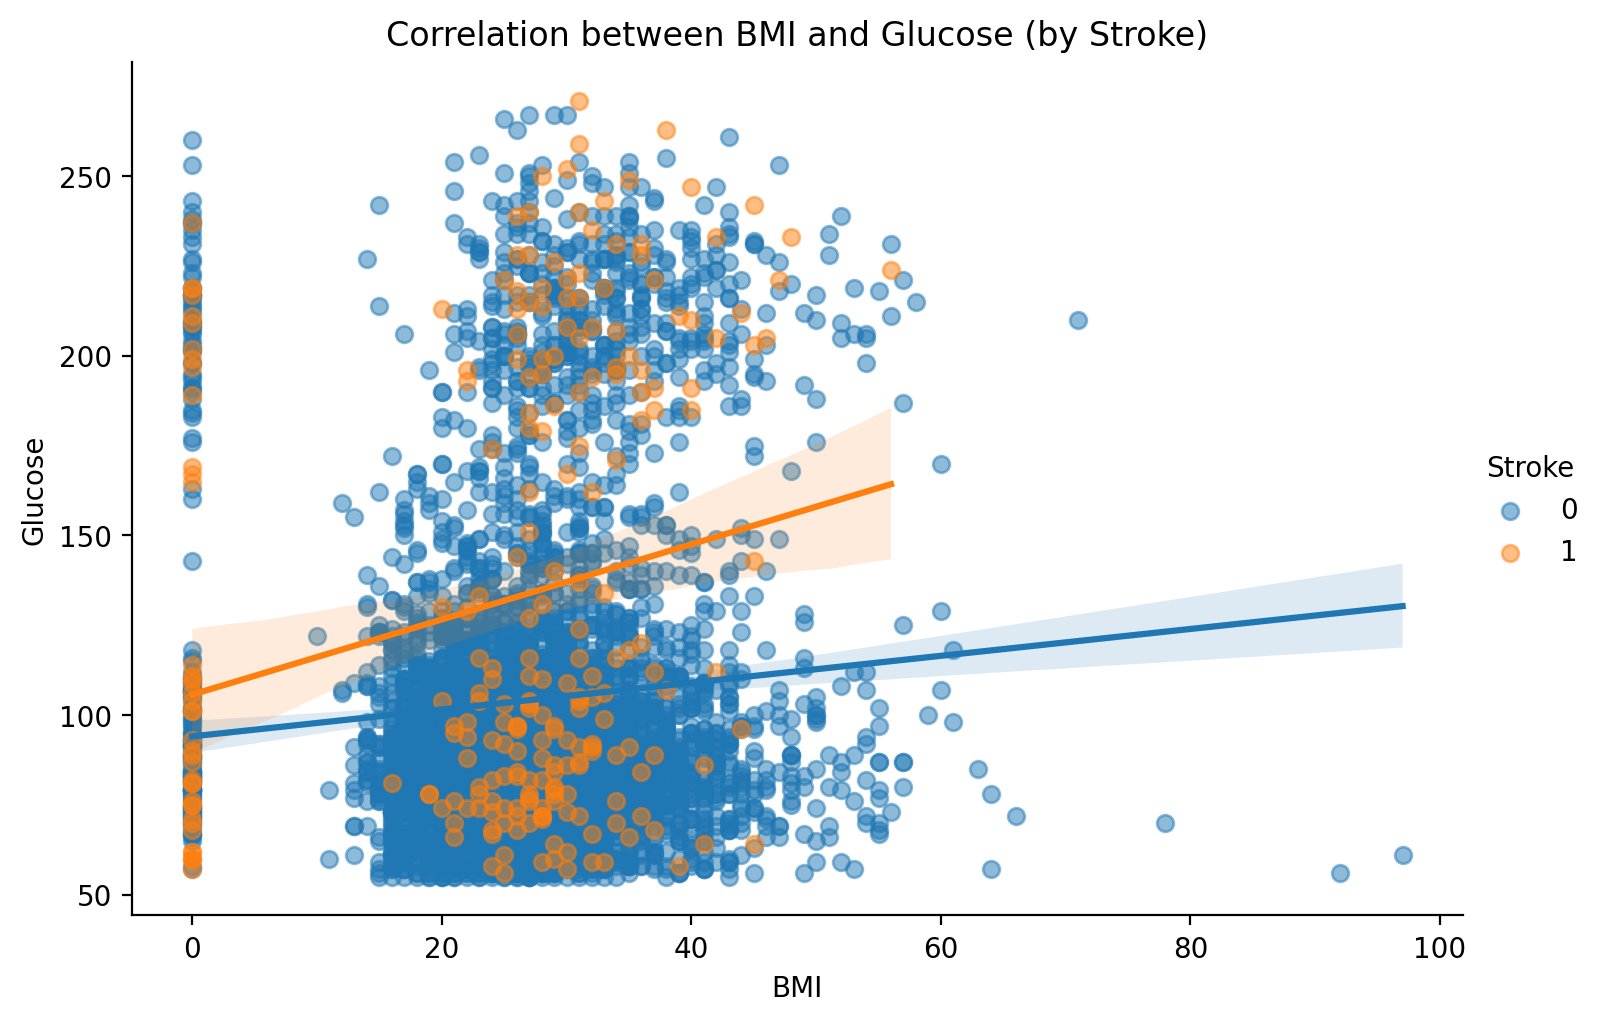

In [11]:
# === 3. Scatter plots with regression lines (examples) ===
sns.lmplot(x="Age", y="Glucose", hue="Stroke", data=df, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("Correlation between Age and Glucose (by Stroke)")
plt.show()

sns.lmplot(x="Age", y="BMI", hue="Stroke", data=df, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("Correlation between BMI and Glucose (by Stroke)")
plt.show()

sns.lmplot(x="BMI", y="Glucose", hue="Stroke", data=df, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("Correlation between BMI and Glucose (by Stroke)")
plt.show()

In [12]:
from pathlib import Path
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

ART = Path("../artifacts/diagnostic")
ART.mkdir(parents=True, exist_ok=True)

# -------------------------------
# 1) Correlation heatmap (PNG) + CSV
# -------------------------------
correlations_data = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlations_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (All Features)", fontsize=14, pad=15)
plt.tight_layout()
plt.savefig(ART / "correlation_heatmap.png", dpi=150)
plt.close()

correlations_data.to_csv(ART / "correlation_matrix.csv")

# -------------------------------
# 2) Plotly scatter-matrix (HTML + PNG)
# -------------------------------
selected = ["Age", "Glucose", "BMI"]

fig_sm = px.scatter_matrix(
    df[selected],
    dimensions=selected,
    title="Pair Plot for Selected Features",
)

# Aesthetics
for tr in fig_sm.data:
    tr.update(marker=dict(color="blue", size=3, opacity=0.7))

# Responsive layout — fits Streamlit container nicely
fig_sm.update_layout(
    autosize=True,
    width=None,
    height=560,  # smaller height fits normal laptop screen
    margin=dict(l=30, r=30, t=40, b=30)
)

# --- Export responsive HTML ---
html = pio.to_html(
    fig_sm,
    include_plotlyjs="cdn",
    full_html=False,
    default_width="100%",     # ✅ makes responsive
    default_height="560px"
)
(ART / "scatter_matrix.html").write_text(html, encoding="utf-8")

# --- Export static PNG (requires kaleido) ---
try:
    fig_sm.write_image(ART / "scatter_matrix.png", scale=2)
    print("Saved scatter_matrix.png")
except Exception as e:
    print("NOTE: PNG export skipped (install 'kaleido' to enable).", e)

# -------------------------------
# 3) Seaborn regression plots (PNG)
# -------------------------------
g = sns.lmplot(x="Age", y="Glucose", hue="Stroke", data=df, aspect=1.5, scatter_kws={'alpha': 0.5})
g.fig.suptitle("Correlation between Age and Glucose (by Stroke)", y=1.02)
g.fig.savefig(ART / "lm_age_glucose.png", dpi=150, bbox_inches="tight")
plt.close(g.fig)

g = sns.lmplot(x="Age", y="BMI", hue="Stroke", data=df, aspect=1.5, scatter_kws={'alpha': 0.5})
g.fig.suptitle("Correlation between Age and BMI (by Stroke)", y=1.02)
g.fig.savefig(ART / "lm_age_bmi.png", dpi=150, bbox_inches="tight")
plt.close(g.fig)

g = sns.lmplot(x="BMI", y="Glucose", hue="Stroke", data=df, aspect=1.5, scatter_kws={'alpha': 0.5})
g.fig.suptitle("Correlation between BMI and Glucose (by Stroke)", y=1.02)
g.fig.savefig(ART / "lm_bmi_glucose.png", dpi=150, bbox_inches="tight")
plt.close(g.fig)

print("✅ Saved all diagnostic artifacts to:", ART.resolve())

# always save HTML (no extra install needed)
pio.write_html(fig_sm, ART / "scatter_matrix.html", include_plotlyjs="cdn")

# optional PNG (needs 'kaleido' installed)
try:
    pio.write_image(fig_sm, ART / "scatter_matrix.png", scale=2)
except Exception as e:
    print("NOTE: PNG export of Plotly figure skipped (install kaleido to enable).", e)

# -------------------------------
# 3) Seaborn lmplots (PNG)
# -------------------------------
g = sns.lmplot(x="Age", y="Glucose", hue="Stroke", data=df, aspect=1.5, scatter_kws={'alpha':0.5})
g.fig.suptitle("Correlation between Age and Glucose (by Stroke)", y=1.02)
g.fig.savefig(ART / "lm_age_glucose.png", dpi=150, bbox_inches="tight"); plt.close(g.fig)

g = sns.lmplot(x="Age", y="BMI", hue="Stroke", data=df, aspect=1.5, scatter_kws={'alpha':0.5})
g.fig.suptitle("Correlation between Age and BMI (by Stroke)", y=1.02)
g.fig.savefig(ART / "lm_age_bmi.png", dpi=150, bbox_inches="tight"); plt.close(g.fig)

g = sns.lmplot(x="BMI", y="Glucose", hue="Stroke", data=df, aspect=1.5, scatter_kws={'alpha':0.5})
g.fig.suptitle("Correlation between BMI and Glucose (by Stroke)", y=1.02)
g.fig.savefig(ART / "lm_bmi_glucose.png", dpi=150, bbox_inches="tight"); plt.close(g.fig)

print("Saved artifacts to:", ART.resolve())


NOTE: PNG export skipped (install 'kaleido' to enable). 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido

✅ Saved all diagnostic artifacts to: C:\Users\Htet Wai Aung\OneDrive\Documents\GitHub\PROHI-dashboard-demo\artifacts\diagnostic
NOTE: PNG export of Plotly figure skipped (install kaleido to enable). 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido

Saved artifacts to: C:\Users\Htet Wai Aung\OneDrive\Documents\GitHub\PROHI-dashboard-demo\artifacts\diagnostic
